In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('clean_data.csv')

In [3]:
data

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,3045.98,2544.85,2253.3444,1873.8678,1.1691,94.9722,0.1210,1.4752,0.0084,0.0009,...,47.958333,0.4948,0.0123,0.0033,2.4804,0.0291,0.0102,0.0033,35.0279,-1.0
1,3151.98,2563.75,2175.2556,1022.1660,1.2833,100.6222,0.1250,1.4536,-0.0110,-0.0035,...,111.563900,0.5063,0.0113,0.0031,2.2284,0.0291,0.0102,0.0033,35.0279,-1.0
2,3071.18,2489.86,2195.3000,1151.8233,0.9220,103.5467,0.1232,1.4826,0.0136,0.0009,...,83.487367,0.5033,0.0112,0.0029,2.2320,0.0291,0.0102,0.0033,35.0279,-1.0
3,2958.46,2523.78,2171.8556,1156.6018,1.4025,100.1367,0.1243,1.4645,0.0001,0.0067,...,38.998500,0.4954,0.0136,0.0033,2.7511,0.0291,0.0102,0.0033,35.0279,-1.0
4,3196.21,2413.39,2255.5222,1763.0739,1.2226,101.5878,0.1200,1.4845,-0.0037,0.0049,...,353.831900,0.5058,0.0094,0.0026,1.8673,0.0053,0.0188,0.0057,353.8319,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,3169.00,2265.60,2187.9889,1096.3790,0.9065,97.6567,0.1221,1.4109,-0.0239,-0.0121,...,73.633500,0.4912,0.0127,0.0039,2.5801,0.0166,0.0122,0.0036,73.6335,-1.0
833,2923.19,2516.40,2180.8889,1084.7221,0.9085,94.2467,0.1226,1.3137,0.0345,-0.0137,...,69.087633,0.4939,0.0163,0.0037,3.2914,0.0166,0.0122,0.0036,73.6335,-1.0
834,3003.43,2448.34,2205.5000,1287.3538,2.3842,111.7644,0.1241,1.4339,0.0020,-0.0036,...,80.579000,0.4966,0.0084,0.0020,1.6866,0.0166,0.0122,0.0036,73.6335,-1.0
835,2953.63,2500.05,2195.9778,1388.2869,1.5605,103.2400,0.1234,1.5177,0.0183,-0.0137,...,171.318300,0.5009,0.0135,0.0035,2.7038,0.0178,0.0305,0.0106,171.3183,-1.0


In [4]:
X = data.drop(columns='Good/Bad')
y = data.loc[: , 'Good/Bad']

In [24]:
def elbow_plot(x):
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i, init='k-means++' , random_state=42)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1,11),wcss)
    plt.title('the elbow method')
    plt.xlabel('number of clusters')
    plt.ylabel('WCSS')
    plt.plot()
    kn = KneeLocator(range(1,11), wcss, curve = 'convex', direction='decreasing')
    return kn.knee

C:\Users\amrit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


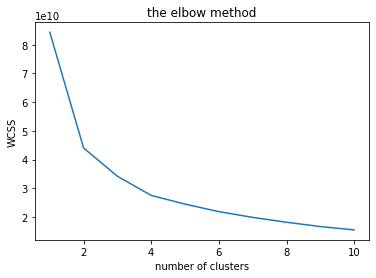

In [28]:
number_of_clusters = elbow_plot(X)

In [31]:
# create clusters

def create_clusters(X , number_of_clusters):
    data = X
    kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++' , random_state=42)
    y_kmeans= kmeans.fit_predict(X)
    data['Clusters'] = y_kmeans
    return data

In [32]:
X = create_clusters(X , number_of_clusters)

In [33]:
X

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Clusters
0,3045.98,2544.85,2253.3444,1873.8678,1.1691,94.9722,0.1210,1.4752,0.0084,0.0009,...,47.958333,0.4948,0.0123,0.0033,2.4804,0.0291,0.0102,0.0033,35.0279,0
1,3151.98,2563.75,2175.2556,1022.1660,1.2833,100.6222,0.1250,1.4536,-0.0110,-0.0035,...,111.563900,0.5063,0.0113,0.0031,2.2284,0.0291,0.0102,0.0033,35.0279,2
2,3071.18,2489.86,2195.3000,1151.8233,0.9220,103.5467,0.1232,1.4826,0.0136,0.0009,...,83.487367,0.5033,0.0112,0.0029,2.2320,0.0291,0.0102,0.0033,35.0279,0
3,2958.46,2523.78,2171.8556,1156.6018,1.4025,100.1367,0.1243,1.4645,0.0001,0.0067,...,38.998500,0.4954,0.0136,0.0033,2.7511,0.0291,0.0102,0.0033,35.0279,0
4,3196.21,2413.39,2255.5222,1763.0739,1.2226,101.5878,0.1200,1.4845,-0.0037,0.0049,...,353.831900,0.5058,0.0094,0.0026,1.8673,0.0053,0.0188,0.0057,353.8319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,3169.00,2265.60,2187.9889,1096.3790,0.9065,97.6567,0.1221,1.4109,-0.0239,-0.0121,...,73.633500,0.4912,0.0127,0.0039,2.5801,0.0166,0.0122,0.0036,73.6335,1
833,2923.19,2516.40,2180.8889,1084.7221,0.9085,94.2467,0.1226,1.3137,0.0345,-0.0137,...,69.087633,0.4939,0.0163,0.0037,3.2914,0.0166,0.0122,0.0036,73.6335,0
834,3003.43,2448.34,2205.5000,1287.3538,2.3842,111.7644,0.1241,1.4339,0.0020,-0.0036,...,80.579000,0.4966,0.0084,0.0020,1.6866,0.0166,0.0122,0.0036,73.6335,2
835,2953.63,2500.05,2195.9778,1388.2869,1.5605,103.2400,0.1234,1.5177,0.0183,-0.0137,...,171.318300,0.5009,0.0135,0.0035,2.7038,0.0178,0.0305,0.0106,171.3183,0


In [34]:
X['Labels'] = y

In [35]:
X

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Clusters,Labels
0,3045.98,2544.85,2253.3444,1873.8678,1.1691,94.9722,0.1210,1.4752,0.0084,0.0009,...,0.4948,0.0123,0.0033,2.4804,0.0291,0.0102,0.0033,35.0279,0,-1.0
1,3151.98,2563.75,2175.2556,1022.1660,1.2833,100.6222,0.1250,1.4536,-0.0110,-0.0035,...,0.5063,0.0113,0.0031,2.2284,0.0291,0.0102,0.0033,35.0279,2,-1.0
2,3071.18,2489.86,2195.3000,1151.8233,0.9220,103.5467,0.1232,1.4826,0.0136,0.0009,...,0.5033,0.0112,0.0029,2.2320,0.0291,0.0102,0.0033,35.0279,0,-1.0
3,2958.46,2523.78,2171.8556,1156.6018,1.4025,100.1367,0.1243,1.4645,0.0001,0.0067,...,0.4954,0.0136,0.0033,2.7511,0.0291,0.0102,0.0033,35.0279,0,-1.0
4,3196.21,2413.39,2255.5222,1763.0739,1.2226,101.5878,0.1200,1.4845,-0.0037,0.0049,...,0.5058,0.0094,0.0026,1.8673,0.0053,0.0188,0.0057,353.8319,0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,3169.00,2265.60,2187.9889,1096.3790,0.9065,97.6567,0.1221,1.4109,-0.0239,-0.0121,...,0.4912,0.0127,0.0039,2.5801,0.0166,0.0122,0.0036,73.6335,1,-1.0
833,2923.19,2516.40,2180.8889,1084.7221,0.9085,94.2467,0.1226,1.3137,0.0345,-0.0137,...,0.4939,0.0163,0.0037,3.2914,0.0166,0.0122,0.0036,73.6335,0,-1.0
834,3003.43,2448.34,2205.5000,1287.3538,2.3842,111.7644,0.1241,1.4339,0.0020,-0.0036,...,0.4966,0.0084,0.0020,1.6866,0.0166,0.0122,0.0036,73.6335,2,-1.0
835,2953.63,2500.05,2195.9778,1388.2869,1.5605,103.2400,0.1234,1.5177,0.0183,-0.0137,...,0.5009,0.0135,0.0035,2.7038,0.0178,0.0305,0.0106,171.3183,0,-1.0


In [36]:
X.to_csv('data_clusters.csv', index = False)